# Análise do compartilhamento de bicicletas da Cyclistic

#### Estudo de caso do projeto final do Certificado Profissional de Análise de Dados do Google

O estudo de caso tem como finalidade analisar os dados da empresa fictícia Cyclistic, um programa de compartilhamento de bicicletas em Chicago, para responder ou ter mais informações sobre as seguintes questões:
1. Como os membros anuais e os ciclistas casuais usam as bicicletas da Cyclistic de forma diferente?
2. Por que os passageiros casuais iriam querer adquirir planos anuais da Cyclistic?
3. Como a Cyclistic pode usar a mídia digital para influenciar os passageiros casuais a se tornarem membros?

#### Dados

O [conjunto de dados](https://divvy-tripdata.s3.amazonaws.com/index.html) utilizado é de domínio público sujeito aos [termos de licença](https://www.divvybikes.com/data-license-agreement). A cidade de Chicago tem os direitos e interesse sob os dados que foram fornecidos pela Lyft Bikes and Scooters, LLC(“Bikeshare”) que opera na cidade como um serviço de compartilhamento de bicicletas. Existem 3 tipos diferentes: passes de viagem única, passes de dia inteiro e planos anuais. Os clientes que adquirem passes de viagem única ou de dia inteiro são chamados de passageiros casuais. Os clientes que adquirem planos anuais são membros Cyclistic. Os dados já foram previamente verificados e não possuem qualquer informação privada dos usuários do serviço. Será utilizado dados do compartilhamento de bicicletas entre Janeiro e Dezembro de 2022 (12 meses). Cada conjunto de dados está separado por mês, obtendo-se assim 12 conjutos de dados ao todo.


#### Início da análise
1. Importação dos pacotes a serem utilizados para a análise dos dados.


In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

2. Ler os dados dos 12 meses (Janeiro até Dezembro de 2022), e concatená-los em um só DataFrame para análise.

In [2]:
jan_2022 = pd.read_csv('/kaggle/input/google-casestudy-1-2022-2023/202201-divvy-tripdata.csv')
fev_2022 = pd.read_csv('/kaggle/input/google-casestudy-1-2022-2023/202202-divvy-tripdata.csv')
mar_2022 = pd.read_csv('/kaggle/input/google-casestudy-1-2022-2023/202203-divvy-tripdata.csv')
abr_2022 = pd.read_csv('/kaggle/input/google-casestudy-1-2022-2023/202204-divvy-tripdata.csv')
mai_2022 = pd.read_csv('/kaggle/input/google-casestudy-1-2022-2023/202205-divvy-tripdata.csv')
jun_2022 = pd.read_csv('/kaggle/input/google-casestudy-1-2022-2023/202206-divvy-tripdata.csv')
jul_2022 = pd.read_csv('/kaggle/input/google-casestudy-1-2022-2023/202207-divvy-tripdata.csv')
ago_2022 = pd.read_csv('/kaggle/input/google-casestudy-1-2022-2023/202208-divvy-tripdata.csv')
set_2022 = pd.read_csv('/kaggle/input/google-casestudy-1-2022-2023/202209-divvy-publictripdata.csv')
out_2022 = pd.read_csv('/kaggle/input/google-casestudy-1-2022-2023/202210-divvy-tripdata.csv')
nov_2022 = pd.read_csv('/kaggle/input/google-casestudy-1-2022-2023/202211-divvy-tripdata.csv')
dez_2022 = pd.read_csv('/kaggle/input/google-casestudy-1-2022-2023/202212-divvy-tripdata.csv')

year_2022 = pd.concat([jan_2022,fev_2022,mar_2022,abr_2022,mai_2022,jun_2022,jul_2022,ago_2022,set_2022,out_2022,nov_2022,dez_2022],ignore_index=True)

3. Verificação das colunas e números dos dados, algumas colunas contém dados nulos, porém não serão as colunas a serem utilizadas para a análise inicial, por esse motivo os valores nulos não apresentarão problemas. Verificação de dados duplicados (não há).

In [3]:
year_2022.info(show_counts=True)
# year_2022.drop_duplicates()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5667717 entries, 0 to 5667716
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   ride_id             5667717 non-null  object 
 1   rideable_type       5667717 non-null  object 
 2   started_at          5667717 non-null  object 
 3   ended_at            5667717 non-null  object 
 4   start_station_name  4834653 non-null  object 
 5   start_station_id    4834653 non-null  object 
 6   end_station_name    4774975 non-null  object 
 7   end_station_id      4774975 non-null  object 
 8   start_lat           5667717 non-null  float64
 9   start_lng           5667717 non-null  float64
 10  end_lat             5661859 non-null  float64
 11  end_lng             5661859 non-null  float64
 12  member_casual       5667717 non-null  object 
dtypes: float64(4), object(9)
memory usage: 562.1+ MB


4. Criação de nova coluna para análise, 'time_elapsed_minutes', utilizando as colunas 'started_at' e 'ended_at' para saber a média de tempo de cada viagem de bicicleta, verificação de valores negativos provavelmente causados por entradas errôneas no banco de dados, correção desses dados (transformados em valores positivos).

In [4]:
year_2022['time_elapsed_minutes'] = (pd.to_datetime(year_2022['ended_at']) - pd.to_datetime(year_2022['started_at'])).dt.total_seconds()/60
year_2022.query('time_elapsed_minutes < 0')
year_2022['time_elapsed_minutes'] = year_2022['time_elapsed_minutes'].abs()

5. Criação de duas novas colunas 'day_of_week' e 'month' para definir os dias da semana e mês correspondente a cada viagem, respectivamente.
* 'day_of_week' com valores de 0 a 6 correspondendo a cada dia da semana 0 sendo Segunda-feira e 6 sendo Domingo
* 'month' com valores de 1 a 12 correspondendo a cada mês 1 sendo Janeiro e 12 sendo Dezembro

In [5]:
year_2022['day_of_week'] = pd.DatetimeIndex(year_2022['started_at']).dayofweek
year_2022['month'] = pd.DatetimeIndex(year_2022['started_at']).month

6. Agrupar os dados pela coluna 'member_casual' ('casual': passes únicos ou passes de um dia inteiro, 'member': planos anuais) e verificar o número de viagens, duração máxima e mínima de cada viagem e a média de duração dessas viagens.

In [6]:
year_2022.groupby('member_casual')['time_elapsed_minutes'].agg(['count','max','min','mean'])

,count,max,min,mean
member_casual,,,,
casual,2322032,41387.25,0.0,29.145769
member,3345685,10353.35,0.0,12.717261


7. Ao analisar os dados da consulta anterior verifica-se que há viagens com valores iguais a 0, provável registro errado, desconsideraremos essas linhas com valores nulos e rodaremos a consulta anterior novamente. As mudanças de média não foram tão significativas, porém devemos sempre verificar os dados que estamos utilizando.

In [7]:
year_2022 = year_2022.drop(year_2022.query('time_elapsed_minutes == 0').index)
year_2022.groupby('member_casual')['time_elapsed_minutes'].agg(['count','max','min','mean'])

,count,max,min,mean
member_casual,,,,
casual,2321824,41387.25,0.016667,29.148380
member,3345462,10353.35,0.016667,12.718108


8. Ainda podemos ver valores estranhos na coluna 'min' onde seria difícil uma viagem durar apenas 1 segundo, estão iremos retirar também as viagens abaixo de 1 minuto e então rodaremos a consulta novamente. E em seguida verificaremos a porcentagem de membros 'casual' e membros 'member' de acordo com o número de viagens.

In [8]:
year_2022 = year_2022.drop(year_2022.query('time_elapsed_minutes < 1').index)
year_2022.groupby('member_casual')['time_elapsed_minutes'].agg(['count','max','min','mean'])

,count,max,min,mean
member_casual,,,,
casual,2274183,41387.25,1.0,29.750238
member,3272519,10353.35,1.0,12.992471


In [9]:
p = year_2022.groupby('member_casual')['ride_id'].count().reset_index()
p['percentage'] = 100 * p['ride_id']/p['ride_id'].sum()
p

,member_casual,ride_id,percentage
0,casual,2274183,41.000634
1,member,3272519,58.999366


9. Podemos ver na consulta anterior que os membros 'casual' tem uma duração média de viagens bem maior que os membros 'member', as viagens mais longas podem indicar lazer enquanto viagens mais curtas dos 'member' podem significar viagens rotineiras, considerando que há muito mais viagens de membros 'member', porém precisaremos fazer outras consultas para verificação. Faremos uma consulta para quantidade de viagens por dia da semana.

In [10]:
year_2022.groupby(['day_of_week','member_casual'])['time_elapsed_minutes'].agg('count')

day_of_week  member_casual
0            casual           272051
             member           463269
1            casual           258294
             member           507800
2            casual           268784
             member           512628
3            casual           303016
             member           520795
4            casual           327771
             member           456921
5            casual           463304
             member           432859
6            casual           380963
             member           378247
Name: time_elapsed_minutes, dtype: int64

10. Utilizaremos um gráfico para esta consulta para melhor visualização.

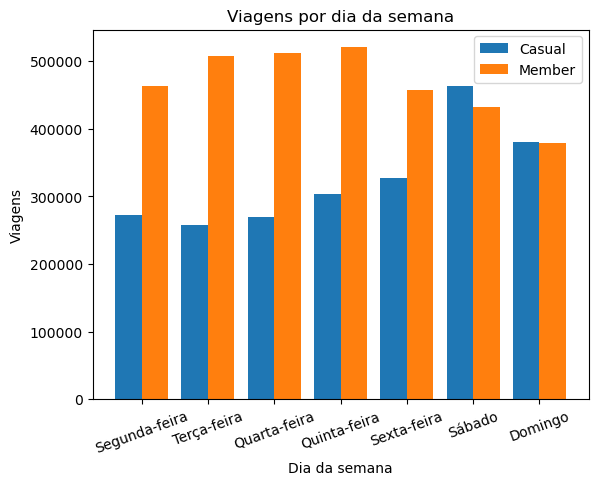

In [11]:
x = np.arange(7)
grouped_days = year_2022[['day_of_week','member_casual','time_elapsed_minutes']]
grouped_casual = grouped_days.query("member_casual == 'casual'").groupby('day_of_week').agg('count')
grouped_member = grouped_days.query("member_casual == 'member'").groupby('day_of_week').agg('count')
plt.bar(x-0.2,grouped_casual['time_elapsed_minutes'], width=0.4)
plt.bar(x+0.2,grouped_member['time_elapsed_minutes'], width=0.4)
plt.title("Viagens por dia da semana")
plt.xticks(x,['Segunda-feira','Terça-feira','Quarta-feira','Quinta-feira','Sexta-feira','Sábado','Domingo'],rotation=20)
plt.xlabel('Dia da semana')
plt.ylabel('Viagens')
plt.legend(['Casual','Member'])
plt.show()

11. Podemos ver que as viagens dos 'member' são maiores durante os dias da semana e decaem ao fim da mesma e no final de semana. Já os membros 'casual' possuem menos viagens durante a semana e aos finais de semana ultrapassam os membros 'member'. Mais um indício provável da teoria anterior que os membros 'casual' utilizam os serviços mais como lazer enquanto os 'member' o utilizam mais no dia-a-dia.

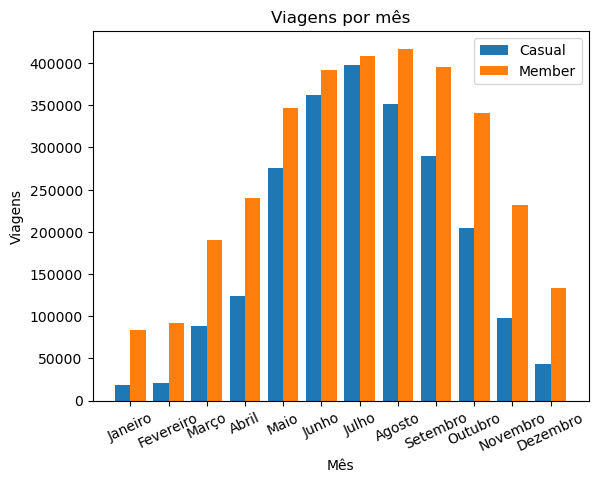

In [12]:
x_1 = np.arange(12)
grouped_month = year_2022[['member_casual','month','time_elapsed_minutes']]
grouped_month_casual = grouped_month.query('member_casual == "casual"').groupby('month').agg('count')
grouped_month_member = grouped_month.query('member_casual == "member"').groupby('month').agg('count')
plt.bar(x_1-0.2,grouped_month_casual['time_elapsed_minutes'], width=0.4)
plt.bar(x_1+0.2,grouped_month_member['time_elapsed_minutes'], width=0.4)
plt.title('Viagens por mês')
plt.xticks(x_1,['Janeiro','Fevereiro','Março','Abril','Maio','Junho','Julho','Agosto','Setembro','Outubro','Novembro','Dezembro'],rotation=25)
plt.xlabel('Mês')
plt.ylabel('Viagens')
plt.legend(['Casual','Member'])
plt.show()


12. Podemos observar uma grande diferença na utilização das bicicletas compartilhasdas ao longo do ano, podemos associar as estações do ano, Janeiro e Fevereiro marcam o meio e o fim do inverno em Chicago, de Março a Maio temos um aumento gradativo com a primavera, já de Junho a Agosto vemos o pico de utilização das bicicletas junto com o verão. O mês de Julho em especial quase equipara o número de viagens de membros 'casual' e 'member', de Setembro a Novembro vemos um declínio gradativo com o outono, maio ainda para membros 'casual', e por fim Dezembro, com a chegada do inverno diminui também os números de viagem.

In [13]:
year_2022.groupby(['start_station_name'])['member_casual'].agg('count').sort_values(ascending=False).head(15)

start_station_name
Streeter Dr & Grand Ave               73766
DuSable Lake Shore Dr & Monroe St     40540
DuSable Lake Shore Dr & North Blvd    39226
Michigan Ave & Oak St                 38966
Wells St & Concord Ln                 36944
Clark St & Elm St                     34451
Millennium Park                       34352
Kingsbury St & Kinzie St              33187
Theater on the Lake                   32465
Wells St & Elm St                     31013
Broadway & Barry Ave                  29425
Clark St & Armitage Ave               28581
Wabash Ave & Grand Ave                27208
Wilton Ave & Belmont Ave              27027
Clark St & Lincoln Ave                26840
Name: member_casual, dtype: int64

13. A consulta acima mostra as 15 estações mais utilizadas para se iniciar uma viagem, porém são os dois tipos de membros, tanto 'casual' como 'member', as próximas consultas e visualização se focarão em membros 'casual' para verificarmos qual seria o local mais utilizados por usuários 'casual' do compartilhamento de bicicletas.

In [14]:
station_casual_year = year_2022.query('member_casual =="casual"').groupby(['start_station_name'])['time_elapsed_minutes'].agg('count').sort_values(ascending=False)
station_casual_year.head(10)

start_station_name
Streeter Dr & Grand Ave               57074
DuSable Lake Shore Dr & Monroe St     31329
Millennium Park                       25085
Michigan Ave & Oak St                 24865
DuSable Lake Shore Dr & North Blvd    23179
Shedd Aquarium                        19898
Theater on the Lake                   18218
Wells St & Concord Ln                 15988
Dusable Harbor                        13875
Clark St & Armitage Ave               13603
Name: time_elapsed_minutes, dtype: int64

14. A estação Streeter Dr & Grand Ave recebe um grande número de viagens iniciadas, assim como a DuSable Lake Shore Dr & Monroe St, a consulta acima considera o ano todo, porém iremos verificar durante os meses de maior pico de 'casual', que seriam entre Maio e Setembro.

In [15]:
station_casual_month = year_2022.query('4 < month < 9 & member_casual =="casual"')
station_casual_month = station_casual_month.groupby(['start_station_name','start_lat','start_lng'])['time_elapsed_minutes'].agg('count').sort_values(ascending=False)
station_casual_month.head(10)

start_station_name                  start_lat  start_lng 
Streeter Dr & Grand Ave             41.892278  -87.612043    27086
DuSable Lake Shore Dr & Monroe St   41.880958  -87.616743    13878
DuSable Lake Shore Dr & North Blvd  41.911722  -87.626804    12360
Theater on the Lake                 41.926277  -87.630834     9528
Michigan Ave & Oak St               41.900960  -87.623777     9166
Millennium Park                     41.881032  -87.624084     7128
Dusable Harbor                      41.886976  -87.612813     6460
Montrose Harbor                     41.963982  -87.638181     6001
Wells St & Concord Ln               41.912133  -87.634656     5884
Clark St & Lincoln Ave              41.915689  -87.634600     5865
Name: time_elapsed_minutes, dtype: int64

15. Podemos ver que as 2 estações mais utilizadas continuam as mesmas, havendo mudanças em outras nas demais, será feita uma visualização em gráfico para melhor percepção.

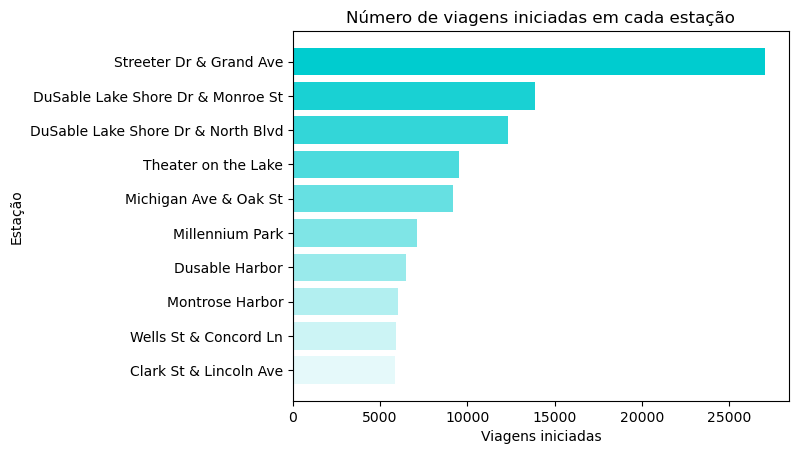

In [16]:
station_casual_month_st = station_casual_month.head(10).sort_values()
cores= [[0,0.8,0.81,(11-i)/10] for i in range(len(station_casual_month_st),0,-1)]
plt.barh(station_casual_month_st.index.get_level_values(0),station_casual_month_st.values,color=cores)
plt.xlabel('Viagens iniciadas')
plt.ylabel('Estação')
plt.title('Número de viagens iniciadas em cada estação')
plt.show()

16. Podemos observar que a estação Streeter Dr & Grand Ave teve mais viagens iniciadas no período entre Maio e Setembro por membros 'casual'.

In [17]:
station_casual_month_end = year_2022.query('4 < month < 9 & member_casual =="casual"')
station_casual_month_end = station_casual_month_end.groupby(['end_station_name','end_lat','end_lng'])['time_elapsed_minutes'].agg('count').sort_values(ascending=False)
station_casual_month_end.head(10)

end_station_name                    end_lat    end_lng   
Streeter Dr & Grand Ave             41.892278  -87.612043    39102
DuSable Lake Shore Dr & North Blvd  41.911722  -87.626804    19636
DuSable Lake Shore Dr & Monroe St   41.880958  -87.616743    18894
Michigan Ave & Oak St               41.900960  -87.623777    15107
Theater on the Lake                 41.926277  -87.630834    13994
Millennium Park                     41.881032  -87.624084    12425
Wells St & Concord Ln               41.912133  -87.634656     9821
Montrose Harbor                     41.963982  -87.638181     9100
Dusable Harbor                      41.886976  -87.612813     9030
Clark St & Lincoln Ave              41.915689  -87.634600     9030
Name: time_elapsed_minutes, dtype: int64

17. Assim como vimos as estações mais utilizadas pelos membros 'casual' para iniciar as viagens, vemos as estações mais utilizadas para a finalização da mesma. Tudo isso no período mais utilizado entre Maio e Setembro. Igualmente ao anterior ploteramos um gráfico para melhor visualização.

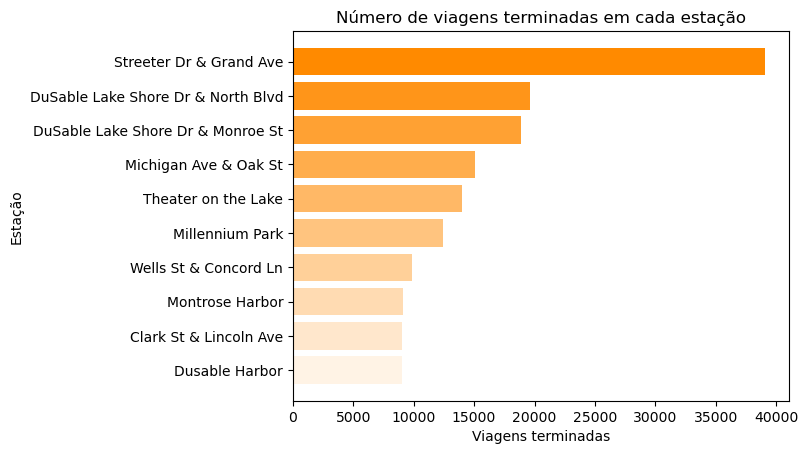

In [18]:
station_casual_month_end_st = station_casual_month_end.head(10).sort_values()
cores= [[1,0.54,0,(11-i)/10] for i in range(len(station_casual_month_st),0,-1)]
plt.barh(station_casual_month_end_st.index.get_level_values(0),station_casual_month_end_st.values,color=cores)
plt.xlabel('Viagens terminadas')
plt.ylabel('Estação')
plt.title('Número de viagens terminadas em cada estação')
plt.show()

18. Podemos observar que as 10 estações são as mesmas em ambos os casos, de iniciação e finalização da viagem, podemos perceber que há muito mais viagens finalizadas em Streeter Dr & Grand Avenue que iniciadas, o que pode indicar que muitas pessoas tem como objetivo chegar nesta estação. Para isso iremos plotar dois gráficos com as coordenadas.

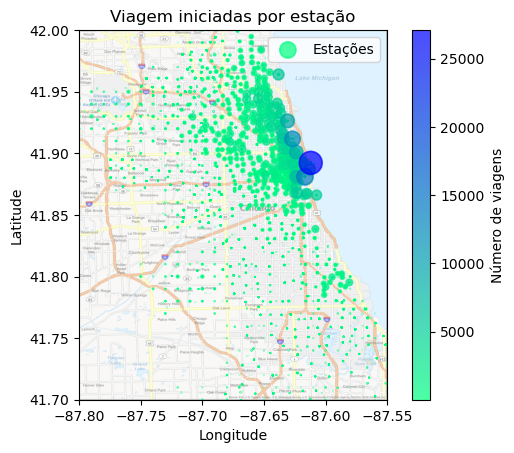

In [19]:
station_casual_month = station_casual_month.sort_values()
chicago_img = mpimg.imread('/kaggle/input/chicago-image/Chicago-Map-Illinois.jpg')
plt.scatter(x=station_casual_month.index.get_level_values(2),y=station_casual_month.index.get_level_values(1),s=station_casual_month.values/100,
            alpha=0.7,label='Estações',linewidths=1.2,c=station_casual_month.values,cmap=plt.get_cmap("winter_r"))
clb = plt.colorbar()
clb.set_label('Número de viagens')
plt.imshow(chicago_img, extent=[-87.80, -87.55, 41.7, 42.0], alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Viagem iniciadas por estação')
plt.legend()
plt.show()

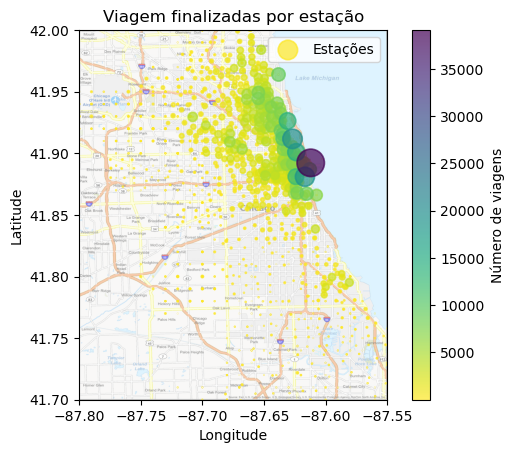

In [20]:
station_casual_month_end = station_casual_month_end.sort_values()
chicago_img = mpimg.imread('/kaggle/input/chicago-image/Chicago-Map-Illinois.jpg')
plt.scatter(x=station_casual_month_end.index.get_level_values(2),y=station_casual_month_end.index.get_level_values(1),s=station_casual_month_end.values/100,
            alpha=0.7,label='Estações',linewidths=1.2,c=station_casual_month_end.values,cmap=plt.get_cmap("viridis_r"))
clb = plt.colorbar()
clb.set_label('Número de viagens')
plt.imshow(chicago_img, extent=[-87.80, -87.55, 41.7, 42.0], alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Viagem finalizadas por estação')
plt.legend()
plt.show()

19. Podemos observar nos dois gráficos anteriores a concentração de viagens na costa de Chicago, no segundo notamos que o volume de viagens terminadas é maior, o que pode ser um indicativo das pessoas irem aproveitar o tempo bom (estações estão entre primavera,verão e outono) nas proximidades das estações.

#### Conclusão

Vamos abordar cada questão separadamente:

**1. Como os membros anuais e os ciclistas casuais usam as bicicletas da Cyclistic de forma diferente?**

Os membros 'member' representam 58.9% dos usuários, enquanto os membros 'casual' representam 41.1%. 

Através dos dados de 2022 analisados, podemos observar que os membros 'casual' e 'member' utilizam o serviço de bicicleta de forma diferente. Os
dados indicam que os membros 'member' utilizam para tarefas do dia a dia, deslocamento para o trabalho, ou escola, pois vemos uma quantidade de viagens maiores desses membros aos dias úteis da semana. Já os membros 'casual' não utilizam muito o serviço durante os dias úteis, aumentando sua utilização nos finais de semana, indicando provável utilização para lazer. 

A média de viagens também pode ser um indicativo, pois apesar da quantidade de viagens de membros 'member' serem muito maiores de que membros 'casual' a duração média da viagem de um 'member' é menos da metade de um membro 'casual' ('member': 12,99 minutos, 'casual': 29,75 minutos). Logo, membros 'member' fazem mais viagens curtas (trechos pré determinados do dia a dia) enquanto 'casual' fazem mais viagens longas (com provável finalidade de lazer).

**2. Por que os passageiros casuais iriam querer adquirir planos anuais da Cyclistic?**

Podemos ver que em certos períodos do ano os membros 'casual' se equiparam na utilização do serviço aos membros 'member', principalmente no verão entre Junho a Agosto. Dessa forma poderia haver uma certa economia ao adquirir os planos anuais, mesmo que utilizem pouco em outros meses.

**3. Como a Cyclistic pode usar a mídia digital para influenciar os passageiros casuais a se tornarem membros?**

Como a provável utilização do serviço para membros 'casual' é com a finalidade do lazer e está ligada as estações e temperaturas do ano, é provável que fazer anúncios em páginas relacionadas a bem-estar, saúde, atividade física, atividades ao ar livre, concentrando a grande parte desses anúncios entre a primavera e o outono (entre Abril e Outubro) com foco maior no período de verão (Junho a Agosto), também fazer anúncios em aplicativos de rotas pela cidade, além de banners e outdoors nas estações mais utilizadas pelos membros casuais (por exemplo a Streeter Dr & Grand Ave).